In [59]:
import sys
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt

In [1]:
trading_results_path = '/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/results/real/full_non-negative_affinity/PnL_new_method'

In [30]:
spy_ind = 567

In [19]:
models = ['pairwise', 'sync', 'spc-homo', 'het']
start = 5
end = 100
signal_length = 50
retrain_period = 10
file_name = f'start{start}end{end}_length{signal_length}_trade{retrain_period}'

In [60]:
df_pvCLCL= pd.read_csv('../data/pvCLCL_clean_winsorized.csv',index_col=0)
trading_dates = df_pvCLCL.columns
trading_dates = list(map(lambda x: dt.datetime.strptime(x,'X%Y%m%d'), trading_dates))

In [42]:
with open(trading_results_path+'/'+file_name + '.pkl', 'rb') as f:
    r = pickle.load(f)

In [54]:
PnL = r['PnL']
for model, pnl in PnL.items():
    PnL[model] = pnl.flatten()

In [56]:
df_PnL = pd.DataFrame(PnL)

In [62]:
df_PnL.index = trading_dates[start+signal_length: start+signal_length+len(df_PnL)]

<AxesSubplot:>

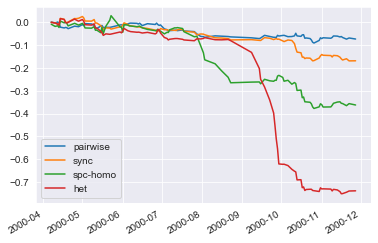

In [81]:
df_PnL.cumsum().plot()

In [28]:
def turnover(weights):
    N, T = weights.shape
    assert T > 1
    weight_change = weights[:, 1:] - weights[:, :-1]
    turnover_rate = np.sum(abs(weight_change))/(T-1)
    return(turnover_rate)

In [82]:
def annualized_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

In [83]:
for model in models:
    weights = r['weights'][model]
    returns = r['PnL'][model]
    print(f'Turnover rate of model {model} ={turnover(weights):.3f}')
    print(f'Sharpe ratio of model {model} ={annualized_sharpe_ratio(returns):.3f}')

Turnover rate of model pairwise =1.979
Sharpe ratio of model pairwise =-1.891
Turnover rate of model sync =1.823
Sharpe ratio of model sync =-3.672
Turnover rate of model spc-homo =2.051
Sharpe ratio of model spc-homo =-3.957
Turnover rate of model het =1.837
Sharpe ratio of model het =-6.493


In [33]:
weights = r['pairwise']['weights']
abs(weights[567, 1:] - weights[567,:-1]).sum()/99

0.9410163235161835

In [74]:
df_weights_spy = pd.DataFrame()
df_weights = pd.DataFrame()
for model in models:
    weights = r['weights'][model]
    spy_weight = weights[spy_ind, :]
    weights_no_spy = np.delete(weights, spy_ind, axis=0)
    df_weights_spy[model] = spy_weight
    df_weights[model] = np.sum(weights_no_spy, axis = 0)

In [79]:
np.sum(abs(weights_no_spy),axis = 0)

array([0.99780094, 0.99780094, 0.99780094, 0.99780094, 0.99780094,
       0.99780094, 0.99780094, 0.99780094, 0.99780094, 0.99780094,
       0.99756439, 0.99756439, 0.99756439, 0.99756439, 0.99756439,
       0.99756439, 0.99756439, 0.99756439, 0.99756439, 0.99756439,
       0.99756961, 0.99756961, 0.99756961, 0.99756961, 0.99756961,
       0.99756961, 0.99756961, 0.99756961, 0.99756961, 0.99756961,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99901648, 0.99704945, 0.99704945, 0.99704945, 0.99704945,
       0.99704945, 0.99901648, 0.99901648, 0.99901648, 0.99901648,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9400285 , 0.9400285 , 0.9400285 , 0.9400285 , 0.9400285 ,
       0.9400285 , 0.9400285 , 0.9400285 , 0.9400285 , 0.9400285 ,
       1.        , 1.        , 0.9826961 , 0.9826961 , 0.98269

In [80]:
weights_no_spy

array([[ 0.0010949 ,  0.0010949 , -0.0010949 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00184719,  0.00184719, -0.00184719, ..., -0.00383889,
        -0.00383889,  0.00383889],
       [ 0.00110161,  0.00110161, -0.00110161, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00077065,
        -0.00077065,  0.00077065],
       [ 0.00079272,  0.00079272, -0.00079272, ..., -0.00121214,
        -0.00121214,  0.00121214],
       [ 0.00374739,  0.00374739, -0.00374739, ..., -0.0049982 ,
        -0.0049982 ,  0.0049982 ]])

<AxesSubplot:>

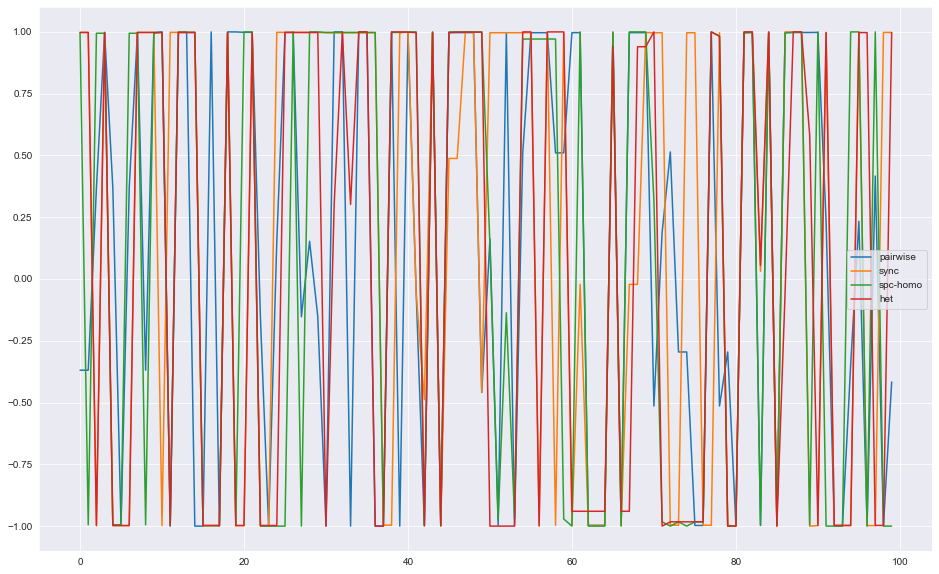

In [76]:
(df_weights).plot(figsize=(16,10))

In [40]:
turnover(weights_no_spy)

1.038176893561911

<AxesSubplot:>

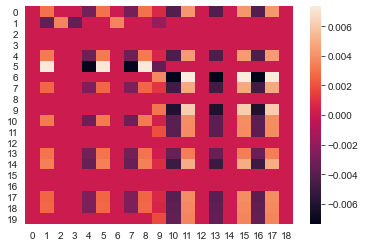

In [37]:
sns.heatmap(weights[:20,1:20] - weights[:20,:19])